In [1]:
"""
Jupyter notebook script showing how to refocus an optical field.

@author: Fredrik Skärberg // fredrik.skarberg@physics.gu.se
"""

import numpy as np
import os
import matplotlib.pyplot as plt

from Utils import Utils #Utils contains function for phase background fit among other functionalities.
from Utils import Utils_z # Utils_z contains functions for z-propagation.

In [2]:
#Set folder name. Plots are saved in plots/xxx
saveplots_name = 'psl_111_propagate'

if not os.path.exists(f"plots/{saveplots_name}"): os.mkdir(f"plots/{saveplots_name}")

#Image path
image_full_path = 'samplefolder/PS_beads_1_1_1.png'

#Colormap for plotting
cmap = 'gray'

In [3]:
#Read image
data = plt.imread(image_full_path)
data = np.array(data, dtype = np.float32)

c:\Users\P14s\Documents\GitHub\off-axis-holography-python\Utils\Utils.py:107: FutureWarning: `selem` is a deprecated argument name for `dilation`. It will be removed in version 1.0. Please use `footprint` instead.
  thresholded_image2 = morphology.dilation(thresholded_image_inv, selem=disk)


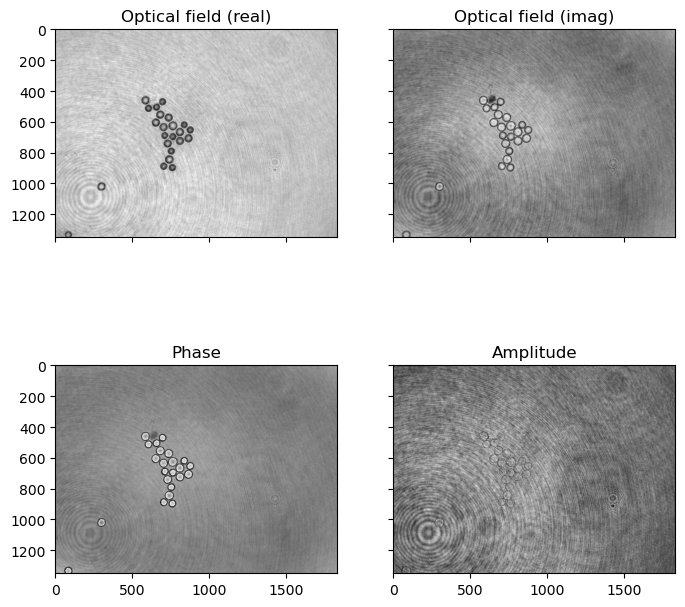

In [4]:
#For more info about how to reconstruct optical field see retrieve_optical_field.ipynb. Here we retrieve the optical field straightforwardly.
crop_size = 50
filter_radius = 200

#Retrieve precalculated constants.
X, Y, X_c, Y_c, position_matrix, G, polynomial, KX, KY, KX2_add_KY2, kx_add_ky, dist_peak = Utils.pre_calculations(data,  filter_radius, cropping = crop_size)


#Retrieve optical field.
optical_field = Utils.imgtofield(
                                data, 
                                G, 
                                polynomial, 
                                KX2_add_KY2, 
                                kx_add_ky,
                                X_c,
                                Y_c,
                                position_matrix,
                                dist_peak,
                                cropping=50,
                                mask_f_case = 'sinc',
                                )

#Plotting
fig, axs = plt.subplots(2, 2, figsize = (8, 8), sharey = True, sharex = True)
axs[0, 0].set_title(f"Optical field (real)")
axs[0, 0].imshow(optical_field.real, cmap = cmap)
axs[0, 1].set_title(f"Optical field (imag)")
axs[0, 1].imshow(optical_field.imag, cmap = cmap)
axs[1, 0].set_title(f"Phase")
axs[1, 0].imshow(np.angle(optical_field), cmap = cmap)
axs[1, 1].set_title(f"Amplitude")
axs[1, 1].imshow(np.abs(optical_field), cmap = cmap)
plt.savefig(f"plots/{saveplots_name}/optical_field_full.png", dpi = 100, bbox_inches = 'tight', facecolor='white', transparent=False)
plt.show()

In [8]:
### Example for propagation

#Wavelength, in mikrometers
wavelength = 0.663

#Number of propagation steps.
n_values = 25 #choose a value that is squared (for easier plot use below. e.g. 4, 9, 16, 25, 36...) 

#Set interval to propagate within. in mikrometers.
z_propagation_steps = np.linspace(-20, 20, n_values)

#Extract a smaller region for faster computations.
optical_field_small = optical_field[400:1000,500:1100]

#Propagate field
optical_fields_popagated = np.array([
    Utils_z.refocus_field_z(
        optical_field_small, 
        z_prop=z, 
        wavelength=wavelength) for z in z_propagation_steps])


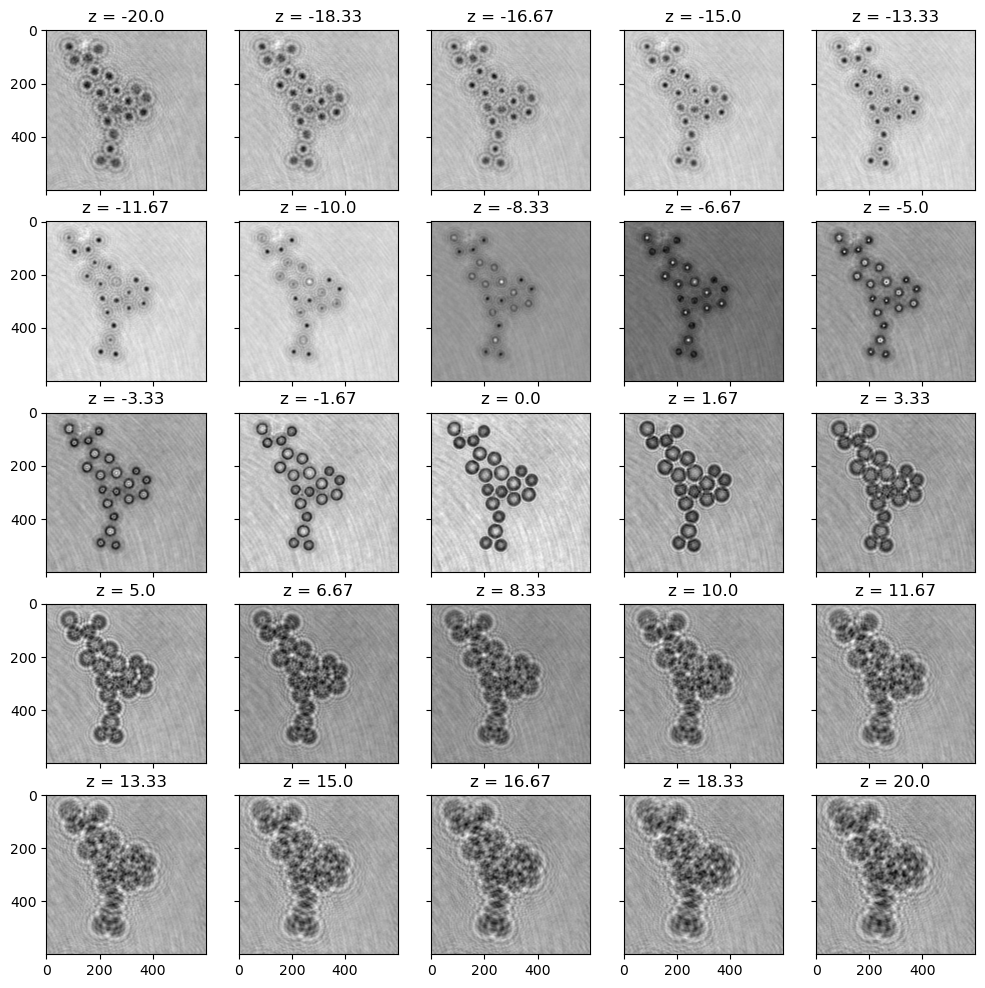

In [9]:
#Plotting of the refocused fields below.

square_gridsize = int(np.sqrt(n_values))
fig, axs = plt.subplots(square_gridsize, square_gridsize, figsize = (12, 12), sharey = True, sharex=True)

count = -1
for row in range(square_gridsize):
    for col in range(square_gridsize):
        count = count + 1

        axs[row, col].set_title(f"z = {np.round(z_propagation_steps[count], 2)}")
        axs[row, col].imshow(optical_fields_popagated[count].real, cmap = cmap)

plt.savefig(f"plots/{saveplots_name}/z_propagation_real.png", dpi = 100, bbox_inches = 'tight', facecolor='white', transparent=False)
plt.show()
